In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
"""
OD_Matrix_pc_75.csv
population_pt_75.csv
OD_Matrix_pt_75.csv
population_pc_75.csv
population.csv
"""
percent_pop = "base"
folder = "basecase"
incubation = 7


melbourne_pc = pd.read_csv('data/'+folder+'/population_pc_'+percent_pop+'.csv', sep=',',header=None)
pop_pc       = melbourne_pc.values
pop_pc       = np.nan_to_num(pop_pc, copy = True)
pop_pc       = pop_pc.astype(int)

od_matrix_pc = genfromtxt('data/'+folder+'/OD_Matrix_pc_'+percent_pop+'.csv', delimiter=',')
od_matrix_pc = np.reshape(od_matrix_pc, (12,309,309))
od_matrix_pc = np.nan_to_num(od_matrix_pc, copy = True)
od_matrix_pc = od_matrix_pc.astype(int)

melbourne_pt = pd.read_csv('data/'+folder+'/population_pt_'+percent_pop+'.csv', sep=',',header=None)
pop_pt       = melbourne_pt.values
pop_pt       = np.nan_to_num(pop_pt, copy = True)
pop_pt       = pop_pt.astype(int)

od_matrix_pt = genfromtxt('data/'+folder+'/OD_Matrix_pt_'+percent_pop+'.csv', delimiter=',')
od_matrix_pt = np.reshape(od_matrix_pt, (12,309,309))
od_matrix_pt = np.nan_to_num(od_matrix_pt, copy = True)
od_matrix_pt = od_matrix_pt.astype(int)

#At this point only have 25% for pop and flow, now we scale them up


pop_pc = pop_pc*4
od_matrix_pc = od_matrix_pc*4

pop_pt = pop_pt*4
od_matrix_pt = od_matrix_pt*4

for i in range(1,12):
    pop_pc[i,:] = pop_pc[0,:]
    pop_pt[i,:] = pop_pt[0,:]

to_this_origin_pc   = np.sum(od_matrix_pc,axis = 1)
from_this_origin_pc = np.sum(od_matrix_pc,axis = 2)

to_this_origin_pt   = np.sum(od_matrix_pt,axis = 1)
from_this_origin_pt = np.sum(od_matrix_pt,axis = 2)

In [72]:
pop = np.sum(pop_pc,axis=1)[0] + np.sum(pop_pt,axis=1)[0]
pop

4632672

In [83]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import random
from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')

random.seed(30)

OD_id = [p for p in range (0,309)]

r = od_matrix_pc.shape[0]
n = pop_pc.shape[1]

initialInd = random.sample(OD_id,30)
initial = np.zeros(n)
initial[initialInd] = 10

model = Param(R0 = 2.4  ,DI = incubation*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run SIR-mobility-mode.py

res = {}
iterations = 3000
inf = 10

res['baseline'] = sir(model,pop_pc,od_matrix_pc,pop_pt,od_matrix_pt,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:54: RuntimeWarning: invalid value encountered in true_divide
  realflow_pc = realflow_pc / realflow_pc.sum(axis=2)[:,:, np.newaxis]
/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:57: RuntimeWarning: invalid value encountered in true_divide
  realflow_pt = realflow_pt / realflow_pt.sum(axis=2)[:,:, np.newaxis]


In [ ]:
_i_work_0

In [51]:
_i_work_0 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [63]:
base_case = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [119]:
data =  res['baseline'][4] + res['baseline'][5]
data  = pd.DataFrame(data)
N = 12
x = data.groupby(data.index // N).sum()
x_np = x.to_numpy()
x_np= x_np.astype(int)

In [112]:
sc_compared     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [108]:
sc_wfh_compared = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [81]:
w50_compared      = x_np.sum(axis=1)

In [86]:
w100_compared     = x_np.sum(axis=1)

In [120]:
sc_compared = x_np.sum(axis=1)

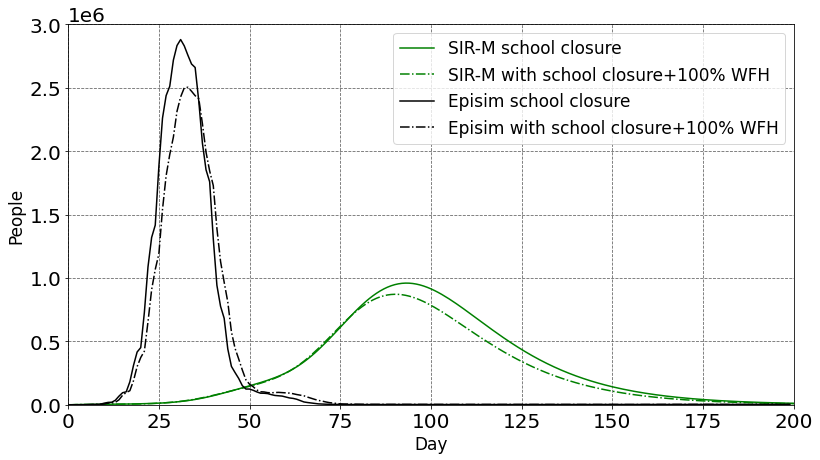

In [114]:
def sir_plot_r(x,y,a,b):
    plt.figure(figsize=(13,7))
    plt.xlim(0,200,1)
    plt.ylim(0, 3000000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='g',label='SIR-M school closure')
    plt.plot(y, color='g',label='SIR-M with school closure+100% WFH',linestyle='-.')

    plt.plot(a, color='k',label='Episim school closure')
    plt.plot(b, color='k',label='Episim with school closure+100% WFH',linestyle='-.')

    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':19})
    
    plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-policies.jpg')
    
sir_plot_r(sc_compared,
          sc_wfh_compared,
          EPSIM_sc,
          EPSIM_sc_wfh) 

In [8]:
newI_inf = res['baseline'][4] + res['baseline'][5] 

newI_inf.astype(int)

newI_inf = np.sum(newI_inf,axis=0)


In [4]:
newI_base = res['baseline'][4] + res['baseline'][5] 

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)


In [13]:
newI = newI_inf - newI_base  
newI = newI.astype(int)
newI =  np.where(newI > 0, 0, newI) 
newI

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,    -1,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,   -15,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,  -377,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

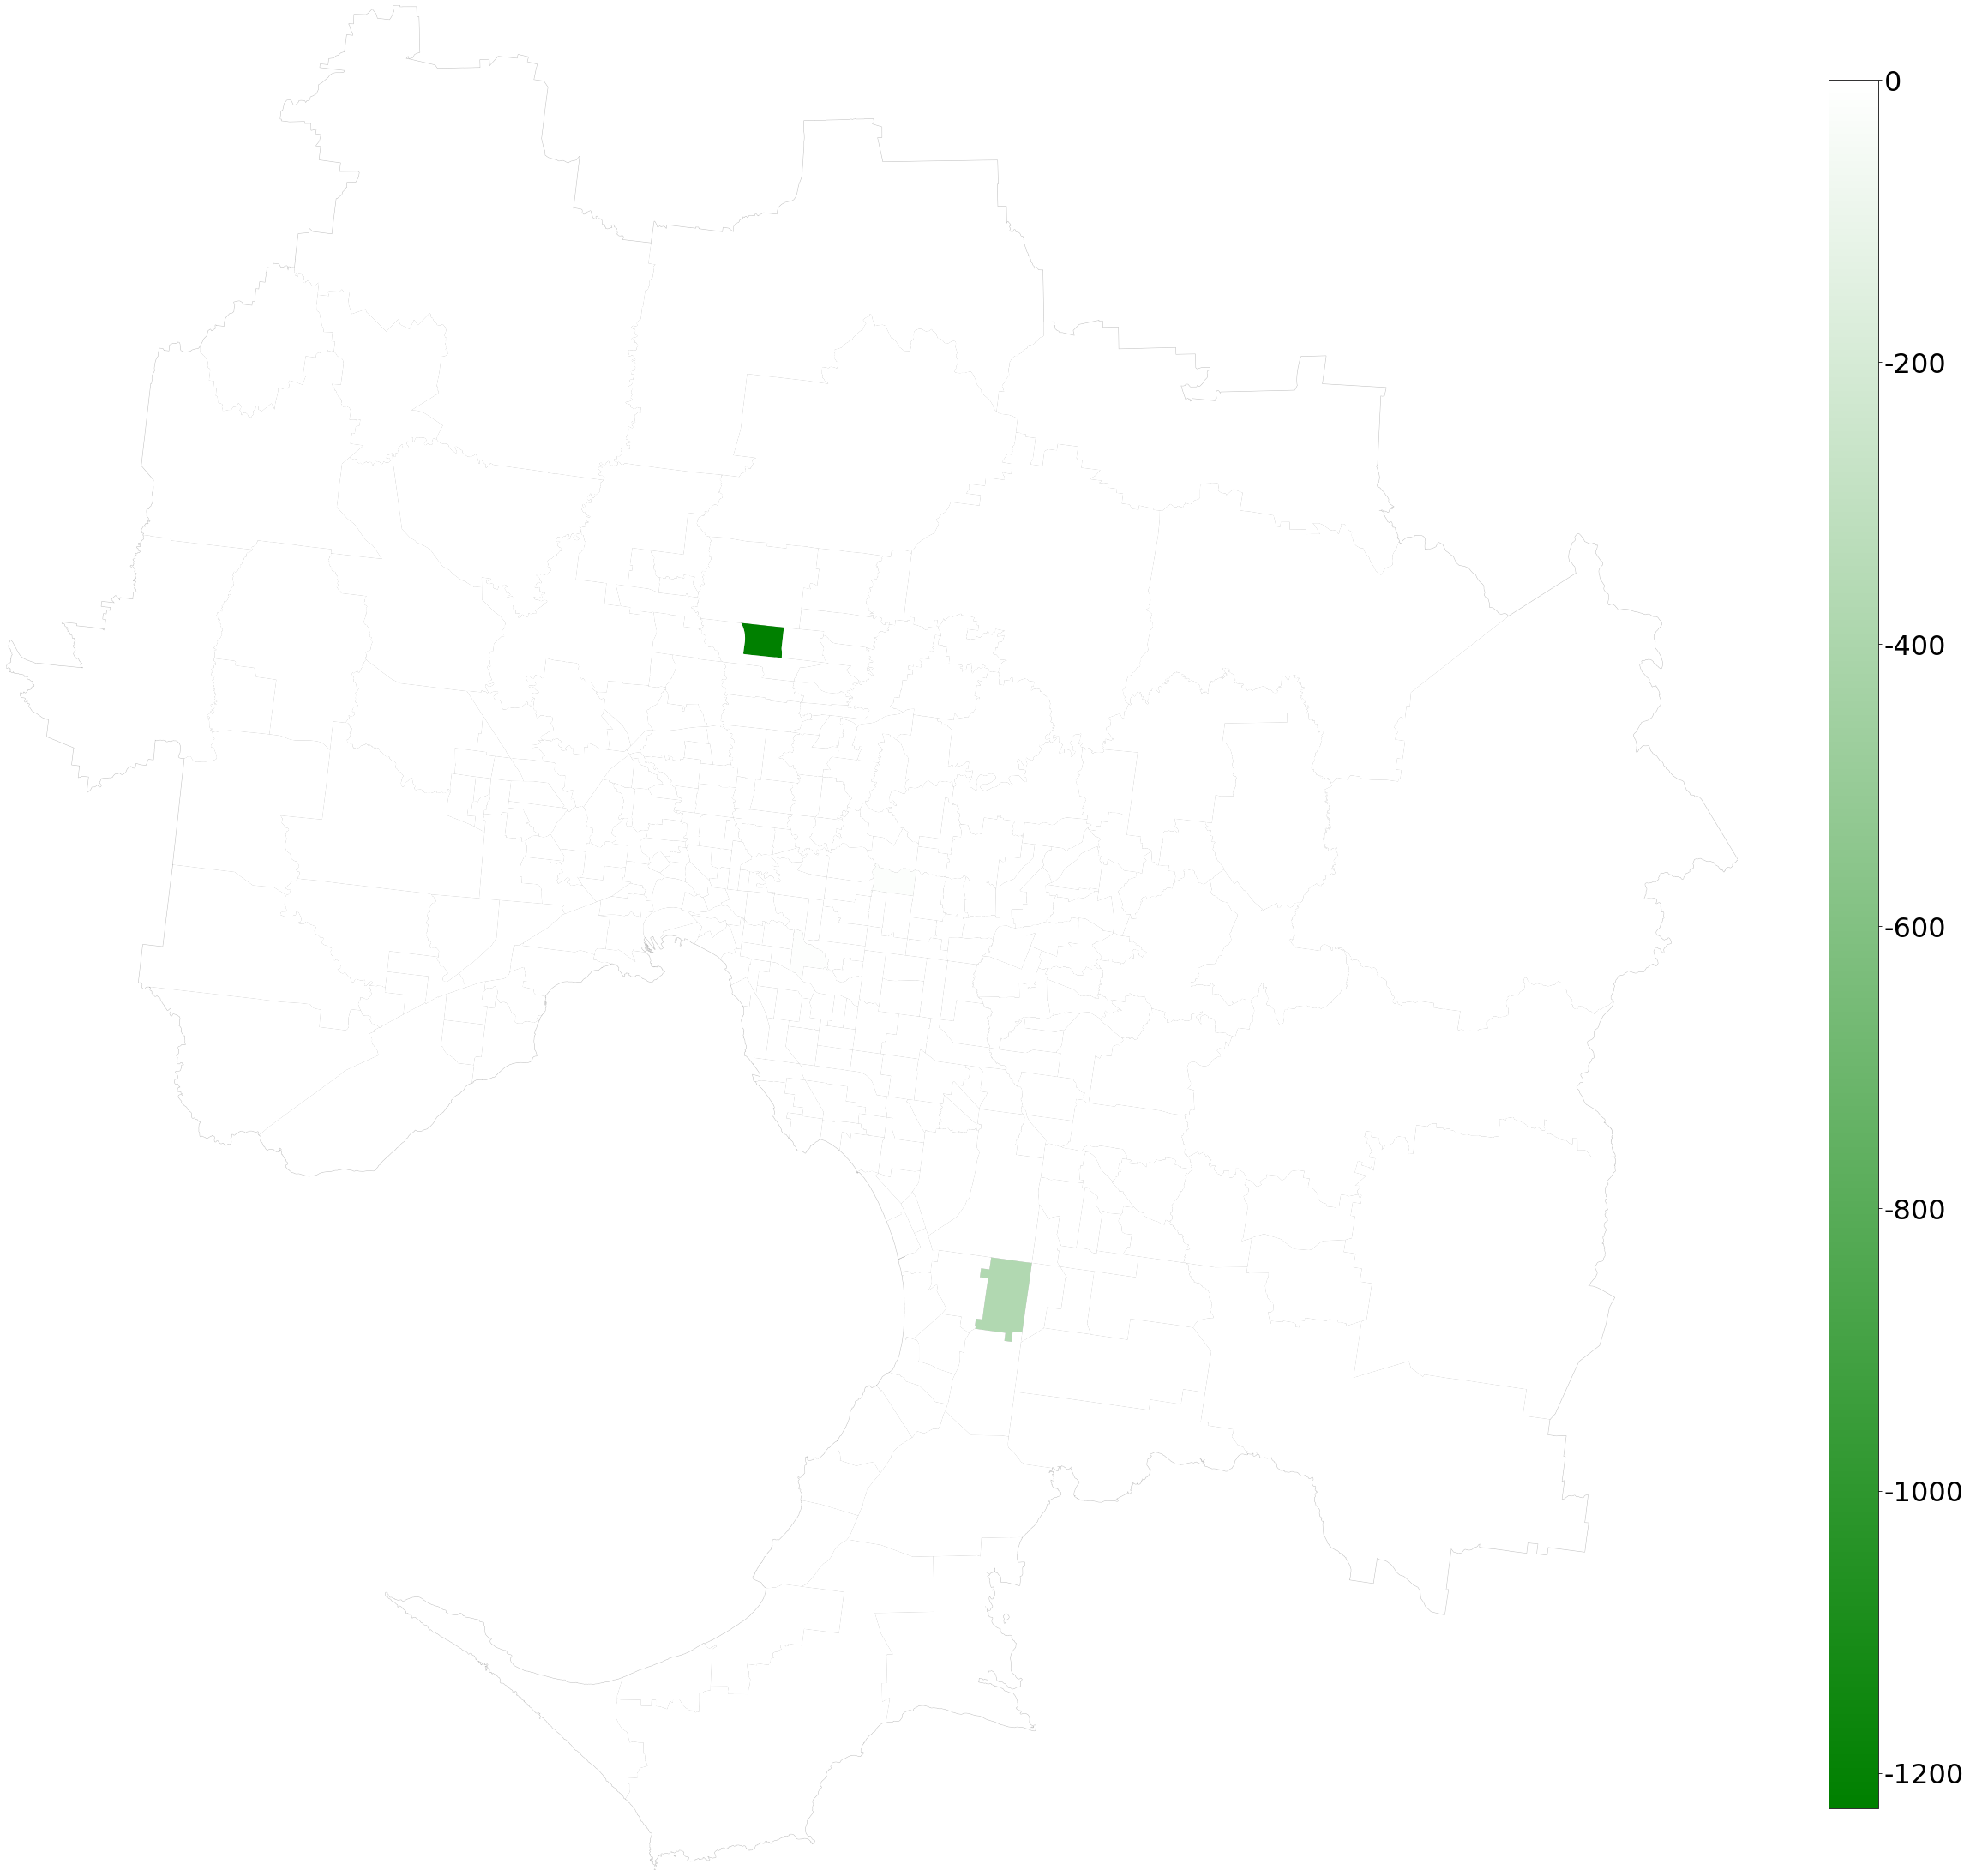

In [14]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])
melbourne_gdf.plot(ax=ax,facecolor='none',edgecolor='gray',alpha=0.5,linewidth=1,zorder=2)
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap,zorder=3)
cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),
                                             vmax=max(melbourne_gpd.population)))

sm._A=[]

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
combine_folder = '/Users/cptnemo2005/Desktop/SEIR/results/combinedpolicies/'
#plt.savefig(stg_folder+'base_vs_'+percent_pop+'-'+str(iterations)+'-iterations.jpg')
#plt.savefig(work_restriction_result+'base_vs_work_'+percent_pop+'-'+str(iterations)+'-iterations.jpg')
plt.savefig(work_restriction_result + 'base_case_{}.jpg'.format(iterations))

plt.show()

In [120]:
total_infect = np.sum(res['baseline'][4]) + np.sum(res['baseline'][5])
total_infect

3420385.207504512

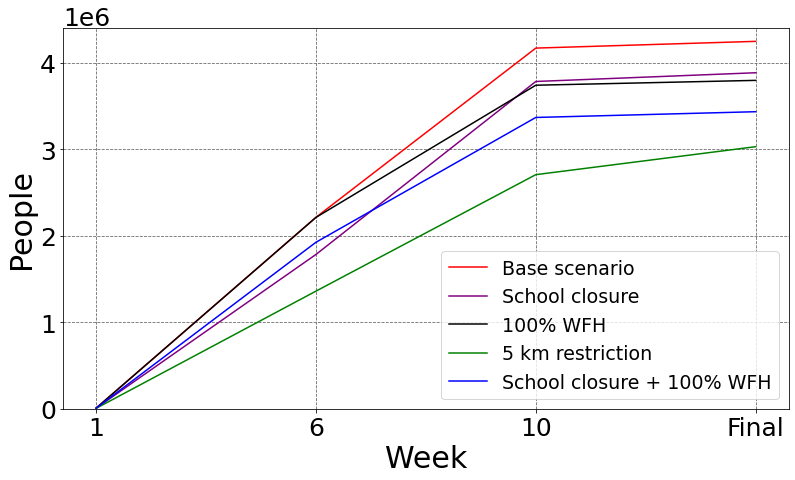

In [8]:
import numpy as np
import  matplotlib.pyplot as plt

agg_base_case         = np.array([8628,2214375,4170893,4248774])
agg_sc                = np.array([8015,1784815,3784891,3885712])
agg_5km               = np.array([5588,1360844,2707417,3030769])
agg_staggered         = np.array([9324,2208397,4170446,4248850])
agg_i_work_0          = np.array([8099,2213348,3741663,3797624])
agg_i_combine         = np.array([7114,1925783,3368834,3435296])
agg_base_case         = np.array([8628,2214375,4170893,4248774])
results = '/Users/cptnemo2005/Desktop/SEIR/results/'
def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4400000,1)
    plt.xlabel("Week",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='red',label='Base scenario')
    plt.plot(y, color='purple',label='School closure ')
    plt.plot(b, color='black',label='100% WFH')
    plt.plot(z, color='green',label='5 km restriction')
    plt.plot(a, color='blue',label='School closure + 100% WFH')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=4, prop={'size':19})
    plt.savefig('/Users/cptnemo2005/new_results/agg-policies-'+ str(incubation)+ '.jpg')
    
sir_plot_r(agg_base_case,
           agg_sc,
           agg_5km, 
           agg_i_combine,
           agg_i_work_0)

In [36]:
_i_work_0   = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [32]:
_sc         = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [24]:
_5km  = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [28]:
_i_combine  = res['baseline'][2][::12,1] + res['baseline'][0][::12,1] 

In [15]:
_base  = res['baseline'][2][::12,1] + res['baseline'][0][::12,1] 

In [74]:
location_1 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [76]:
location_5 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [78]:
location_10 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [80]:
location_15 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [82]:
location_20 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [84]:
location_30 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

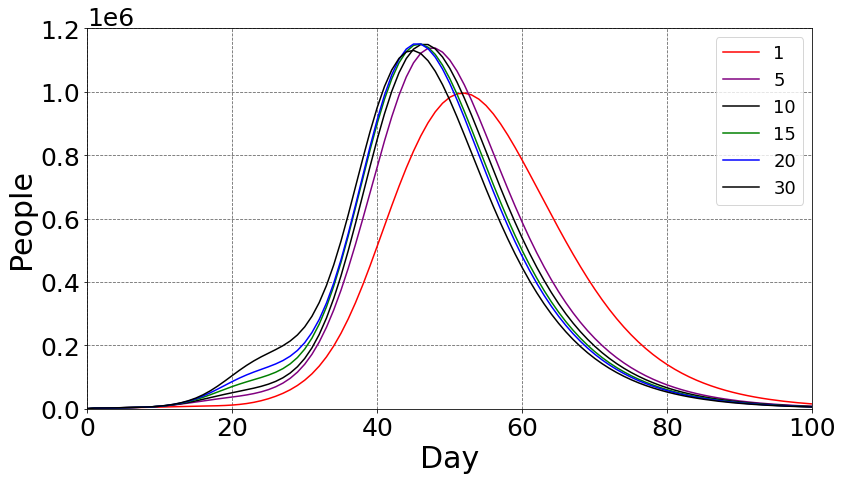

In [87]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='red',label='1')
    plt.plot(y, color='purple',label='5')
    plt.plot(z, color='black',label='10')
    plt.plot(a, color='green',label='15')
    plt.plot(b, color='blue',label='20')
    plt.plot(c, color='k',label='30')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':18})
    
    plt.savefig('/Users/cptnemo2005/new_results/initial-location-analysis.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/incubation-analysis.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/initial-location-analysis.jpg')
    

    
       

sir_plot_r(location_1,
          location_5,
          location_10,
          location_15,
          location_20,
          location_30) 

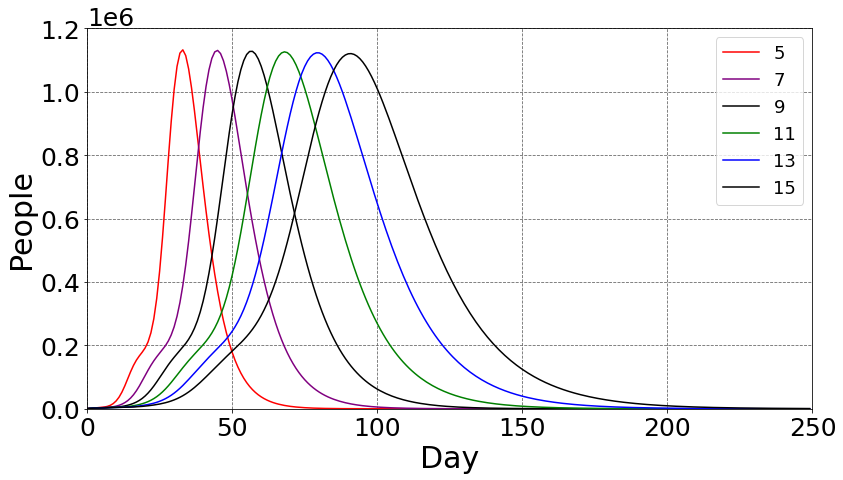

In [70]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,250,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='red',label='5')
    plt.plot(y, color='purple',label='7')
    plt.plot(z, color='black',label='9')
    plt.plot(a, color='green',label='11')
    plt.plot(b, color='blue',label='13')
    plt.plot(c, color='k',label='15')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':18})
    
    plt.savefig('/Users/cptnemo2005/new_results/incubation-analysis.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/incubation-analysis.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/initial-location-analysis.jpg')
    

    
       
sir_plot_r(incubation_5,
           incubation_7,
           incubation_9,
           incubation_11,
          incubation_13,
          incubation_15) 

In [45]:
incubation_5 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [49]:
incubation_7 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [53]:
incubation_9 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [57]:
incubation_11 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [61]:
incubation_13 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [67]:
incubation_15 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

'  \n    \nsir_plot_r(incubation_5,\n           incubation_7,\n           incubation_9,\n           incubation_11,\n          incubation_13,\n          incubation_15) \n  \n\nsir_plot_r(location_1,\n          location_5,\n          location_10,\n          location_15,\n          location_20,\n          location_30)   \n\n\n'

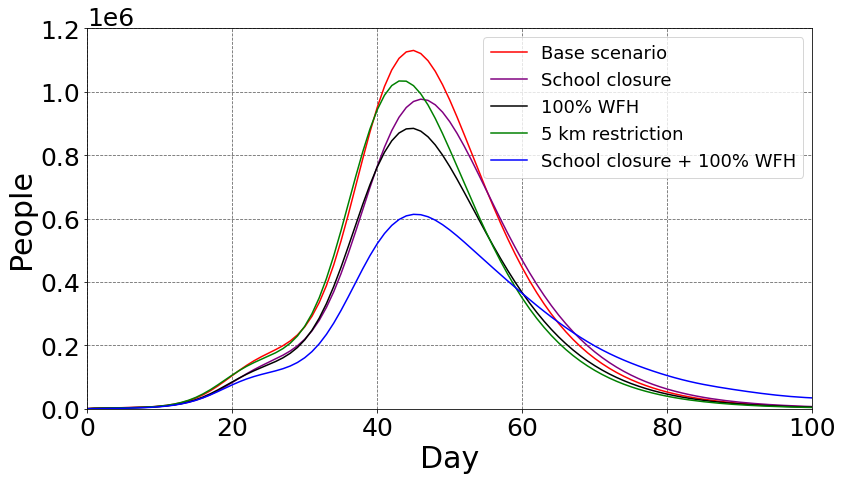

In [40]:
work_restriction_result = '/Users/cptnemo2005/Desktop/SEIR/results/workrestriction/'

def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=30) # Text for X-Axis
    plt.ylabel("People",fontsize=30) 
    plt.plot(x, color='red',label='Base scenario')
    plt.plot(y, color='purple',label='School closure ')
    plt.plot(b, color='black',label='100% WFH')
    plt.plot(z, color='green',label='5 km restriction')
    plt.plot(a, color='blue',label='School closure + 100% WFH')
    #plt.plot(c, color='k',label='30')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.legend(loc=1, prop={'size':18})
    
    plt.savefig('/Users/cptnemo2005/new_results/policies-'+str(incubation)+ '.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/incubation-analysis.jpg')
    #plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/initial-location-analysis.jpg')
    

    
       
sir_plot_r(_base,
            _sc,
           _i_work_0,
           _5km,
           _i_combine
          ) 
  
    
"""  
    
sir_plot_r(incubation_5,
           incubation_7,
           incubation_9,
           incubation_11,
          incubation_13,
          incubation_15) 
  

sir_plot_r(location_1,
          location_5,
          location_10,
          location_15,
          location_20,
          location_30)   


"""

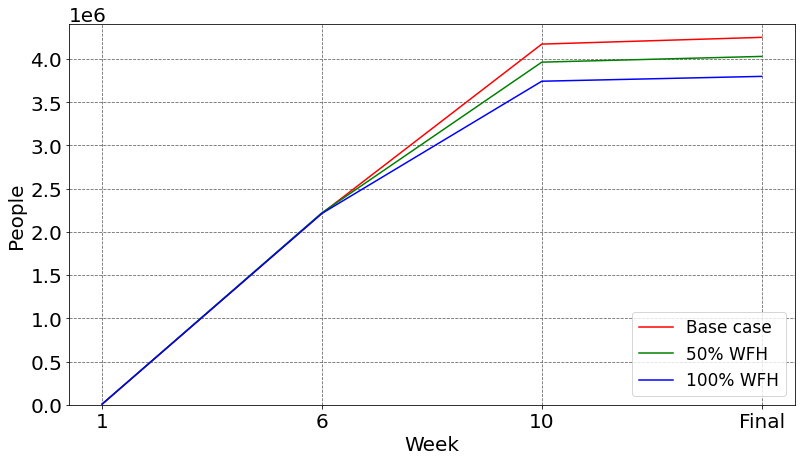

In [5]:
import numpy as np
import matplotlib.pyplot as plt
agg_base_case         = np.array([8628,2214375,4170893,4248774])
agg_i_work_75         = np.array([8543,2216661,4068657,4140470])
agg_i_work_50         = np.array([8460,2221087,3962157,4028456])
agg_i_work_25         = np.array([8301,2220891,3853456,3914310])
agg_i_work_0          = np.array([8099,2213348,3741663,3797624])


def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    #plt.xlim(0, 100,1)
    plt.ylim(0, 4400000,1)
    plt.xlabel("Week",fontsize=20) # Text for X-Axis
    plt.ylabel("People",fontsize=20) 
    plt.plot(x, color='red',label='Base case')
    #plt.plot(y, color='green',label='25% WFH')
    plt.plot(z, color='g',label='50% WFH')
    #plt.plot(a, color='blue',label='75% WFH')
    plt.plot(b, color='blue',label='100% WFH')
    plt.grid(b=True, which='major', color='#666666',linestyle='--')
    plt.xticks(np.arange(4),np.array(['1','6','10','Final']))
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    plt.legend(loc=4, prop={'size':17})
    plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/agg-work-restriction-level-incubation-'+ str(incubation)+ '.jpg')
    
sir_plot_r(agg_base_case,
           agg_i_work_75,
           agg_i_work_50, 
           agg_i_work_25,
           agg_i_work_0)

(256, 4)
[[1.         0.96078431 0.94117647 1.        ]
 [0.99987697 0.95820069 0.93748558 1.        ]
 [0.99975394 0.95561707 0.93379469 1.        ]
 ...
 [0.41917724 0.00369089 0.05294887 1.        ]
 [0.4115494  0.00184544 0.05196463 1.        ]
 [0.40392157 0.         0.05098039 1.        ]]


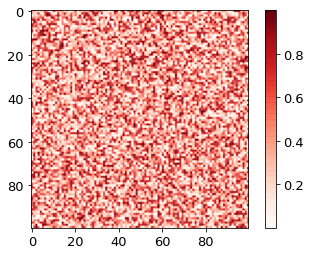

In [20]:
ncolors  = 256

color_array = plt.get_cmap('Reds')(range(ncolors))
print(color_array.shape)
print(color_array)

color_array[:,-1] = np.linspace(0.3,1,ncolors)
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp", colors = color_array)

plt.register_cmap(cmap = map_object)
fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='Reds_transp')
plt.colorbar(mappable=h)

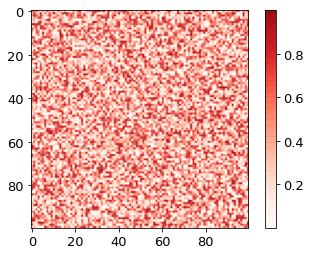

In [21]:
def trunc_colormap(cmap,minval=0.0,maxval= 1.0,n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval,b=maxval),
                                                cmap(np.linspace(minval,maxval,n)))
    return new_cmap
cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap,0.0,.9)

fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

3776506.181287417

In [170]:
_i_go_work_75 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [12]:
_i_go_work_50 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [178]:
_i_go_work_25 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [16]:
_i_work_0     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [8]:
base_case     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

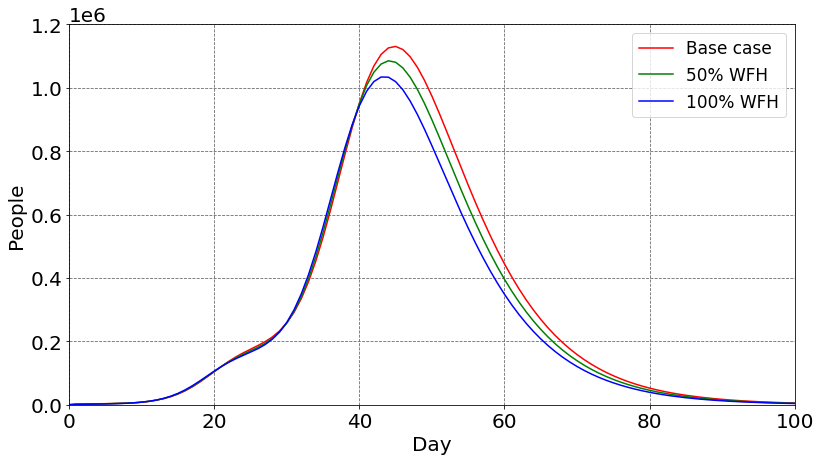

In [18]:
work_restriction_result = '/Users/cptnemo2005/Desktop/SEIR/results/workrestriction/'

def sir_plot_r(x,y,z):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=20) # Text for X-Axis
    plt.ylabel("People",fontsize=20) 
    plt.plot(x, color='red',label='Base case')
    #plt.plot(y, color='green',label='25% WFH')
    plt.plot(y, color='g',label='50% WFH')
    #plt.plot(a, color='blue',label='75% WFH')
    plt.plot(z, color='blue',label='100% WFH')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    plt.legend(loc=1, prop={'size':17})
    
    plt.savefig('/Users/cptnemo2005/Desktop/SEIR/results/submission/work-restriction-level-incubation-7.jpg')
    
sir_plot_r(base_case,
           
           _i_go_work_50,
           
          _i_work_0) 

In [118]:
base_case = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [126]:
_50       = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [122]:
_100      = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [27]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

EPSIM_sc_wfh         = episim_data['sc_wfh']
EPSIM_sc       = episim_data['sc']
EPSIM_base = episim_data['bc']
EPSIM_FROM_HOME = episim_data['wfh']
EPSIM_50_FROM_HOME = episim_data['wfh_50']

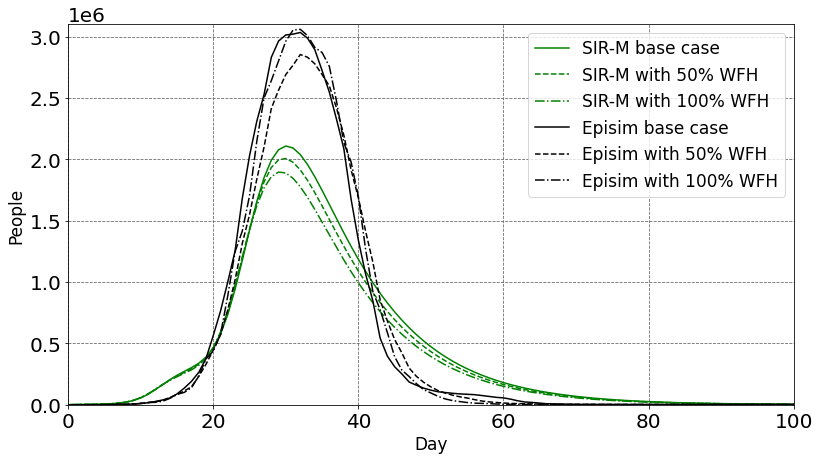

In [129]:
def sir_plot_r(x,y,z,a,b,c):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 3100000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='g',label='SIR-M base case')
    plt.plot(y, color='g',label='SIR-M with 50% WFH',linestyle='--')
    plt.plot(z, color='g',label='SIR-M with 100% WFH',linestyle='-.')
    plt.plot(a, color='k',label='Episim base case')
    plt.plot(b, color='k',label='Episim with 50% WFH',linestyle='--')
    plt.plot(c, color='k',label='Episim with 100% WFH',linestyle='-.')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    plt.legend(loc=1, prop={'size':17})
    
    plt.savefig('/Users/cptnemo2005/new_results/compared-sir-episim-work.jpg')
    
sir_plot_r(base_case,
          _50,
          _100,
          EPSIM_base,
          EPSIM_FROM_HOME,
          EPSIM_50_FROM_HOME) 